                          REGION   AMOUNT  INTEREST CURRENCY  \
0                     Запорізька  20000.0      0.29      UAH   
1                     Харківська  25000.0      0.29      UAH   
2                        Одеська  15000.0      0.29      UAH   
3                   Миколаївська  24000.0      0.31      UAH   
4                   Миколаївська  15000.0      0.29      UAH   
...                          ...      ...       ...      ...   
61211                  Львівська  17000.0      0.31      UAH   
61212                  Львівська  16000.0      0.31      UAH   
61213                   Донецька  18200.0      0.31      UAH   
61214  Автономна Республіка Крим  45000.0      0.31      UAH   
61215  Автономна Республіка Крим  17500.0      0.31      UAH   

               OCCUPATION  TERM  SCHEDULE   FS     ITE      PTI  ...  \
0                     СПД    36         2    Д  0.0000   8.4741  ...   
1                     СПД    36         2    Б  0.0000   0.0000  ...   
2              

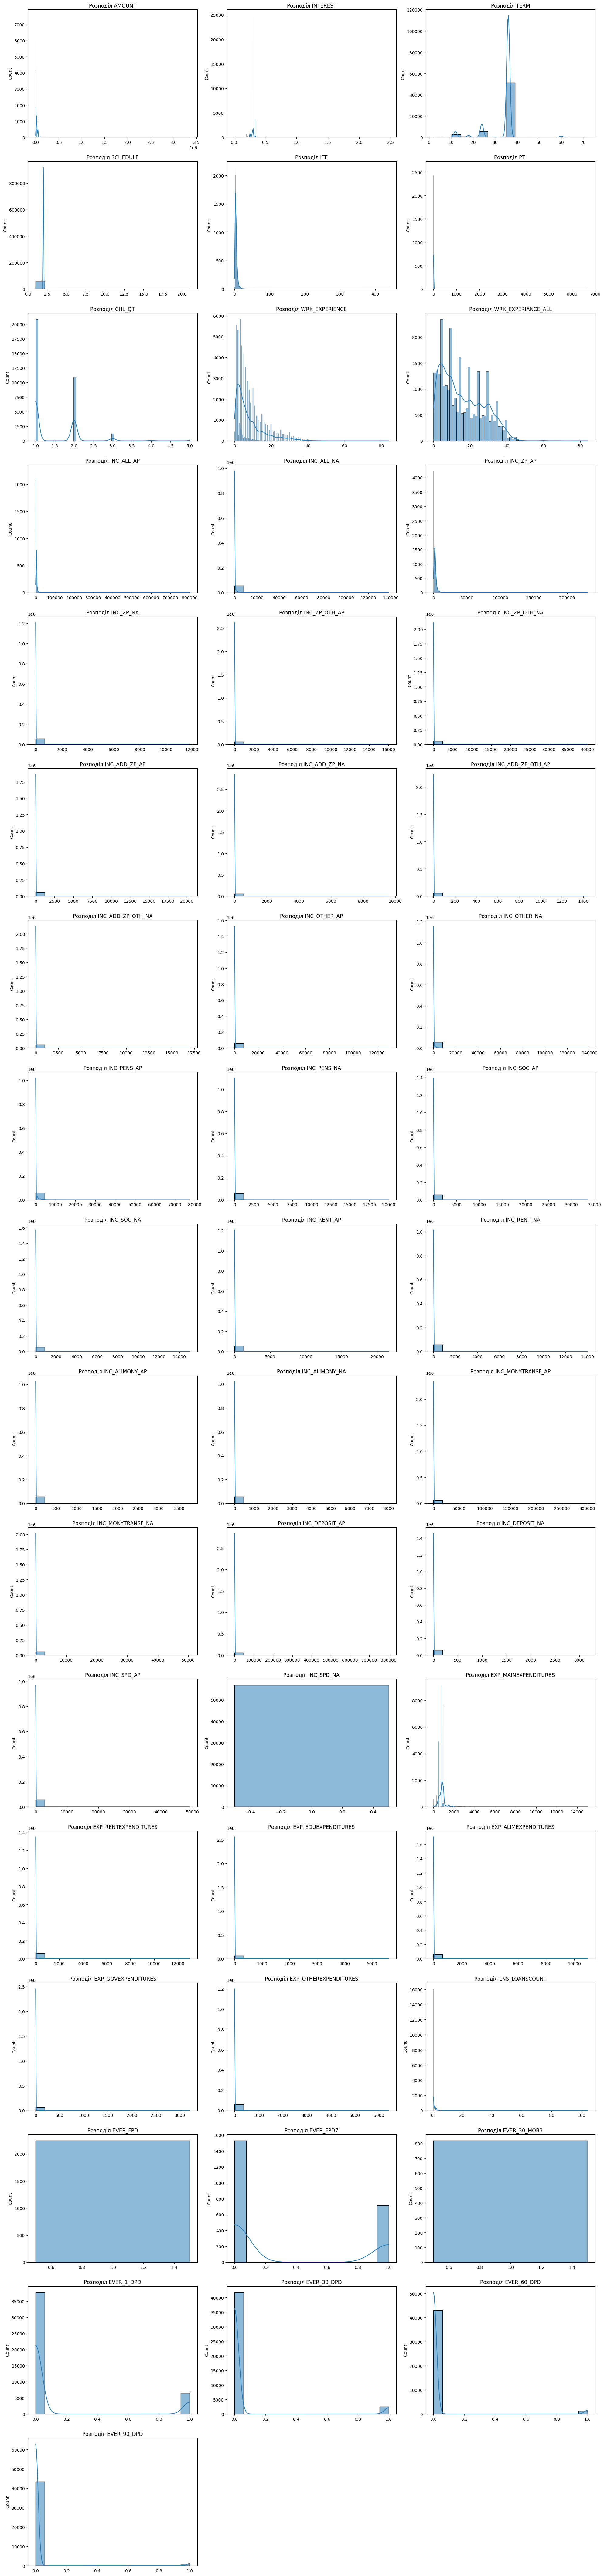

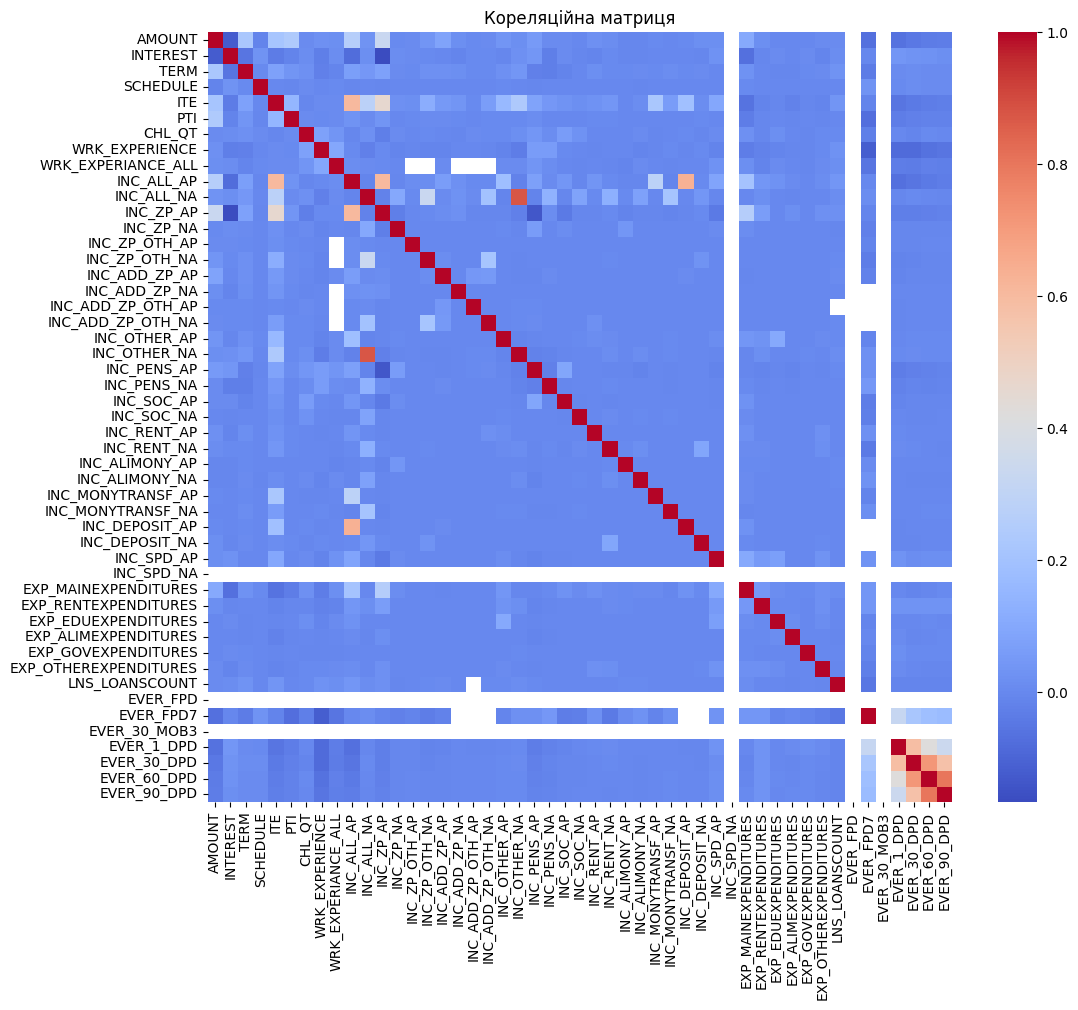


Перевірка якості даних:
Кількість пропущених значень:
REGION              0
AMOUNT              0
INTEREST            0
CURRENCY            0
OCCUPATION          0
                ...  
EVER_30_MOB3    60396
EVER_1_DPD      16968
EVER_30_DPD     16968
EVER_60_DPD     16968
EVER_90_DPD     16968
Length: 61, dtype: int64

Відсоток пропущених значень:
REGION           0.000000
AMOUNT           0.000000
INTEREST         0.000000
CURRENCY         0.000000
OCCUPATION       0.000000
                  ...    
EVER_30_MOB3    98.660481
EVER_1_DPD      27.718244
EVER_30_DPD     27.718244
EVER_60_DPD     27.718244
EVER_90_DPD     27.718244
Length: 61, dtype: float64

Перевірка на дублікати:
Кількість дублікатів: 3

Типи даних стовпців:
REGION           object
AMOUNT          float64
INTEREST        float64
CURRENCY         object
OCCUPATION       object
                 ...   
EVER_30_MOB3    float64
EVER_1_DPD      float64
EVER_30_DPD     float64
EVER_60_DPD     float64
EVER_90_DPD     float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Збір початкових даних
def load_data(file_path):
    df = pd.read_excel(file_path)
    # Перетворення CLN_DATEOFBIRTH на формат datetime
    if 'CLN_DATEOFBIRTH' in df.columns:
        df['CLN_DATEOFBIRTH'] = pd.to_datetime(df['CLN_DATEOFBIRTH'], errors='coerce')
    print(df)
    return df

# Опис даних
def describe_data(df):
    print(df.info())
    print("\nСтатистичний опис числових даних:")
    print(df.select_dtypes(include=['float64', 'int64']).describe())
    print("\nКількість унікальних значень для категоріальних змінних:")
    print(df.select_dtypes(include=['object']).nunique())

# Дослідження даних
def explore_data(df):
    # Візуалізація розподілу числових змінних
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = 3
    n_rows = (len(numeric_cols) - 1) // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
    for i, col in enumerate(numeric_cols):
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
        sns.histplot(df[col].dropna(), ax=ax, kde=True)
        ax.set_title(f'Розподіл {col}')
        ax.set_xlabel('')

    # Видалення зайвих підграфіків
    for i in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols])

    plt.tight_layout()
    plt.show()

    # Кореляційна матриця
    corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Кореляційна матриця')
    plt.show()

# Перевірка якості даних
def check_data_quality(df):
    print("Кількість пропущених значень:")
    print(df.isnull().sum())

    print("\nВідсоток пропущених значень:")
    print((df.isnull().sum() / len(df)) * 100)

    print("\nПеревірка на дублікати:")
    print(f"Кількість дублікатів: {df.duplicated().sum()}")

    print("\nТипи даних стовпців:")
    print(df.dtypes)

# Основна функція
def main():
    file_path = 'Credit Scoring  Final (1) (2).xlsx'  # Замініть на шлях до вашого файлу
    df = load_data(file_path)

    print("Опис даних:")
    describe_data(df)

    print("\nДослідження даних:")
    explore_data(df)

    print("\nПеревірка якості даних:")
    check_data_quality(df)

if __name__ == "__main__":
    main()


In [ ]:
pip install scikit-multilearn

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.exceptions import ConvergenceWarning
from collections import defaultdict
import warnings
import logging

# Set up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Custom transformer for date columns
class DatetimeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column in X.columns:
            if pd.api.types.is_datetime64_any_dtype(X[column]) or isinstance(X[column].iloc[0], str):
                try:
                    date_series = pd.to_datetime(X[column], errors='coerce')
                    X_transformed[f'{column}_year'] = date_series.dt.year
                    X_transformed[f'{column}_month'] = date_series.dt.month
                    X_transformed[f'{column}_day'] = date_series.dt.day
                    X_transformed = X_transformed.drop(columns=[column])
                except Exception:
                    pass
        return X_transformed

# Feature aggregator to sum income and expenses and compute ratios
class FeatureAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, income_prefix='INC_ALL', expense_prefix='EXP_'):
        self.income_prefix = income_prefix
        self.expense_prefix = expense_prefix
        self.income_indices = None
        self.expense_indices = None

    def fit(self, X, y=None):
        if hasattr(X, 'toarray'):
            X = X.toarray()
        if hasattr(X, 'columns'):
            columns = X.columns
        else:
            columns = [f'feature_{i}' for i in range(X.shape[1])]
        self.income_indices = [i for i, col in enumerate(columns) if self.income_prefix in col]
        self.expense_indices = [i for i, col in enumerate(columns) if self.expense_prefix in col]
        return self

    def transform(self, X):
        if hasattr(X, 'toarray'):
            X = X.toarray()
        # Sum income and expense features if they exist
        income_sum = X[:, self.income_indices].sum(axis=1) if self.income_indices else np.zeros(X.shape[0])
        expense_sum = X[:, self.expense_indices].sum(axis=1) if self.expense_indices else np.zeros(X.shape[0])
        # Compute ratio, avoiding division by zero
        income_to_expense_ratio = np.where(expense_sum != 0, income_sum / expense_sum, 0)
        # Append new features
        X_new = np.column_stack((X, income_sum, expense_sum, income_to_expense_ratio))
        return X_new

# Load data
def load_data(file_path):
    return pd.read_excel(file_path, parse_dates=['CLN_DATEOFBIRTH'])

# Prepare data by separating features and targets
def prepare_data(df):
    target_columns = ['EVER_FPD', 'EVER_30_MOB3', 'EVER_30_DPD', 'EVER_60_DPD', 'EVER_90_DPD']
    y = df[target_columns].fillna(0)
    X = df.drop(columns=target_columns)

    # Convert categorical columns to string and handle NaN values
    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_columns:
        X[col] = X[col].astype(str).replace('nan', 'missing')  # Replace NaN with a placeholder

    return X, y

# Ensure all object columns are strings
def enforce_data_types(X):
    object_columns = X.select_dtypes(include=['object']).columns
    for col in object_columns:
        X[col] = X[col].astype(str)
    return X

# Create preprocessor for numeric, categorical, and date columns
def create_preprocessor(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    datetime_features = X.select_dtypes(include=['datetime64']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('datetime', DatetimeTransformer(), datetime_features),
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

    # Integrate Feature Aggregator after preprocessing
    full_preprocessor = Pipeline([
        ('preprocessor', preprocessor),
        ('aggregator', FeatureAggregator())
    ])

    return full_preprocessor

# Build base and ensemble models
def build_models():
    base_models = {
        'SVM': SVC(probability=True, random_state=42, class_weight='balanced', C=0.5, kernel='linear'),
        'Logistic': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10, n_jobs=-1)
    }

    # Wrap each base model with MultiOutputClassifier for multi-label classification
    models = {name: MultiOutputClassifier(model) for name, model in base_models.items()}

    # Neural Network Ensemble using VotingClassifier
    nn_ensemble = VotingClassifier(estimators=[
        ('mlp1', MLPClassifier(hidden_layer_sizes=(50,), random_state=42, batch_size=32, early_stopping=True)),
        ('mlp2', MLPClassifier(hidden_layer_sizes=(100,), random_state=43, batch_size=32, early_stopping=True))
    ], voting='soft', n_jobs=-1)

    models['Neural Net Ensemble'] = MultiOutputClassifier(nn_ensemble)

    return models

# Feature selection using SelectKBest per label
def select_features_per_label(X_train, X_test, y_train, k=10):
    selected_features = set()
    for i, column in enumerate(y_train.columns):
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X_train, y_train.iloc[:, i])
        selected = selector.get_support(indices=True)
        selected_features.update(selected)
        print(f"Selected features for {column}: {selected}")

    selected_features = sorted(selected_features)
    print(f"Total selected features after combining all labels: {len(selected_features)}")

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    return X_train_selected, X_test_selected

# Evaluate model and print results
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    reports = [classification_report(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    conf_matrices = [confusion_matrix(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    return accuracies, reports, conf_matrices

# Main function
def main():
    print("Starting the process.")
    logging.info("Starting the process.")

    # Load and prepare data
    print("Loading data.")
    logging.info("Loading data.")
    df = load_data('Credit Scoring  Final (1) (2).xlsx')

    X, y = prepare_data(df)

    # Ensure all categorical data is in the correct format
    X = enforce_data_types(X)

    print("Data loaded and prepared.")
    logging.info("Data loaded and prepared.")

    # Handle multi-label stratified splitting
    try:
        print("Attempting multi-label stratified splitting.")
        logging.info("Attempting multi-label stratified splitting.")
        from skmultilearn.model_selection import iterative_train_test_split
        X_np = X.values
        y_np = y.values
        X_train, y_train, X_test, y_test = iterative_train_test_split(X_np, y_np, test_size=0.2)
        X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=42)
        X_train = pd.DataFrame(X_train, columns=X.columns)
        X_test = pd.DataFrame(X_test, columns=X.columns)
        y_train = pd.DataFrame(y_train, columns=y.columns)
        y_test = pd.DataFrame(y_test, columns=y.columns)
    except Exception as e:
        print(f"Error during stratified splitting: {e}")
        return

    print("Splitting completed.")
    logging.info("Splitting completed.")

    # Create the preprocessor and transform the data
    preprocessor = create_preprocessor(X)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Feature selection based on training data
    X_train_selected, X_test_selected = select_features_per_label(X_train_processed, X_test_processed, y_train, k=3)

    # Build models
    models = build_models()

    # Train and evaluate models
    for model_name, model in models.items():
        print(f"Training model: {model_name}")
        logging.info(f"Training model: {model_name}")
        model.fit(X_train_selected, y_train)
        accuracies, reports, conf_matrices = evaluate_model(model, X_test_selected, y_test)

        print(f"Model: {model_name} - Accuracies: {accuracies}")
        for report in reports:
            print(report)
        for conf_matrix in conf_matrices:
            print(conf_matrix)

if __name__ == "__main__":
    main()


Starting the process.
Loading data.
Data loaded and prepared.
Attempting multi-label stratified splitting.
Splitting completed.


<ipython-input-5-01a99cfea1c6>:74: RuntimeWarning: invalid value encountered in divide
  income_to_expense_ratio = np.where(expense_sum != 0, income_sum / expense_sum, 0)
<ipython-input-5-01a99cfea1c6>:74: RuntimeWarning: invalid value encountered in divide
  income_to_expense_ratio = np.where(expense_sum != 0, income_sum / expense_sum, 0)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  37  74 173 174 175] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  37  74 173 174 175] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib

Selected features for EVER_FPD: [ 0 45 46]
Selected features for EVER_30_MOB3: [45 46 72]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  37  74 173 174 175] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  37  74 173 174 175] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  37  74 173 174 175] are constant.
  warnings.warn("Features %s are c

Selected features for EVER_30_DPD: [ 0 45 46]
Selected features for EVER_60_DPD: [ 0 45 46]
Selected features for EVER_90_DPD: [ 0 45 46]
Total selected features after combining all labels: 4
Training model: SVM
Model: SVM - Accuracies: [0.9304965697484482, 0.9194707611891538, 0.9466677556354133, 0.9274746814766416, 0.9198791244691278]
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     11795
         1.0       0.33      0.83      0.47       449

    accuracy                           0.93     12244
   macro avg       0.66      0.88      0.72     12244
weighted avg       0.97      0.93      0.94     12244

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     12080
         1.0       0.14      1.00      0.25       164

    accuracy                           0.92     12244
   macro avg       0.57      0.96      0.60     12244
weighted avg       0.99      0.92      0.95     12244

        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Model: Neural Net Ensemble - Accuracies: [0.9737014047696831, 0.9866056844168573, 0.9627572688663836, 0.9786017641293695, 0.9861973211368834]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     11795
         1.0       1.00      0.28      0.44       449

    accuracy                           0.97     12244
   macro avg       0.99      0.64      0.71     12244
weighted avg       0.97      0.97      0.97     12244

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     12080
         1.0       0.00      0.00      0.00       164

    accuracy                           0.99     12244
   macro avg       0.49      0.50      0.50     12244
weighted avg       0.97      0.99      0.98     12244

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     11747
         1.0       0.66      0.17      0.27       497

    accuracy                           0

In [ ]:
#2 variant
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
import logging
from joblib import Parallel, delayed
from sklearn.utils import resample

# Set up logging and warnings
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
warnings.filterwarnings("ignore")


class OptimizedDatetimeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame()
        for column in X.columns:
            if pd.api.types.is_datetime64_any_dtype(X[column]) or isinstance(X[column].iloc[0], str):
                try:
                    date_series = pd.to_datetime(X[column], errors='coerce')
                    X_transformed[f'{column}_year'] = date_series.dt.year
                    X_transformed[f'{column}_month'] = date_series.dt.month
                    X_transformed[f'{column}_day'] = date_series.dt.day
                except Exception:
                    continue
        return X_transformed.values if not X_transformed.empty else np.zeros((X.shape[0], 0))


class OptimizedFeatureAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, income_prefix='INC_ALL', expense_prefix='EXP_'):
        self.income_prefix = income_prefix
        self.expense_prefix = expense_prefix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            return np.column_stack((X, np.zeros((X.shape[0], 3))))

        income_cols = X.columns.str.contains(self.income_prefix)
        expense_cols = X.columns.str.contains(self.expense_prefix)

        income_sum = X.loc[:, income_cols].sum(axis=1)
        expense_sum = X.loc[:, expense_cols].sum(axis=1)
        income_to_expense_ratio = np.where(expense_sum != 0, income_sum / expense_sum, 0)

        return np.column_stack((X, income_sum, expense_sum, income_to_expense_ratio))


def load_and_prepare_data(file_path, target_column='EVER_FPD'):
    df = pd.read_excel(file_path, parse_dates=['CLN_DATEOFBIRTH'])

    y = df[target_column].fillna(0)
    X = df.drop(columns=[target_column])

    categorical_mask = X.dtypes == 'object'
    categorical_columns = X.columns[categorical_mask]
    X[categorical_columns] = X[categorical_columns].astype('category')

    return X, y


def create_optimized_preprocessor(X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['category', 'object']).columns
    datetime_features = X.select_dtypes(include=['datetime64']).columns

    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ])

    preprocessor = ColumnTransformer([
        ('datetime', OptimizedDatetimeTransformer(), datetime_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], n_jobs=-1)

    return Pipeline([
        ('preprocessor', preprocessor),
        ('aggregator', OptimizedFeatureAggregator())
    ])


from sklearn.metrics import classification_report, confusion_matrix


def train_and_evaluate_model_with_metrics(model_tuple, X_train, y_train, X_test, y_test):
    """
    Train a given model and evaluate it on test data, returning accuracy and detailed metrics.
    """
    name, model = model_tuple
    logging.info(f"Training model: {name}")

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Summarize key metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1-Score': class_report['weighted avg']['f1-score'],
        'Confusion Matrix': confusion
    }

    return name, metrics


def main_with_metrics():
    logging.info("Starting the optimized process with metrics evaluation.")

    # Load and preprocess data
    X, y = load_and_prepare_data('Credit Scoring  Final (1) (2).xlsx')
    preprocessor = create_optimized_preprocessor(X)
    X_processed = preprocessor.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y,
        train_size=0.8, test_size=0.2,
        random_state=42, stratify=y
    )

    # Downsample majority class for SMOTE efficiency
    minority_class = y_train.value_counts().idxmin()
    X_minority = X_train[y_train == minority_class]
    y_minority = y_train[y_train == minority_class]
    X_majority = X_train[y_train != minority_class]
    y_majority = y_train[y_train != minority_class]

    X_majority_downsampled, y_majority_downsampled = resample(
        X_majority, y_majority,
        replace=False,
        n_samples=len(y_minority),
        random_state=42
    )

    X_train_balanced = np.vstack((X_majority_downsampled, X_minority))
    y_train_balanced = np.hstack((y_majority_downsampled, y_minority))

    smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_balanced, y_train_balanced)

    # Define models
    models = {
        'SVM': SVC(probability=True, random_state=42, class_weight='balanced', C=0.5, kernel='linear'),
        'Logistic': LogisticRegression(random_state=42, class_weight='balanced', max_iter=500, n_jobs=-1),
        'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=8),
        'Random Forest': RandomForestClassifier(n_estimators=30, random_state=42, class_weight='balanced',
                                                max_depth=6, n_jobs=-1),
        'Neural Net Ensemble': VotingClassifier(estimators=[
            ('mlp1', MLPClassifier(hidden_layer_sizes=(20,), random_state=42, batch_size=128, early_stopping=True)),
            ('mlp2', MLPClassifier(hidden_layer_sizes=(40,), random_state=43, batch_size=128, early_stopping=True))
        ], voting='soft', n_jobs=-1)
    }

    # Parallelize training and evaluation
    results = Parallel(n_jobs=-1)(
        delayed(train_and_evaluate_model_with_metrics)(
            (name, model), X_train_balanced, y_train_balanced, X_test, y_test
        )
        for name, model in models.items()
    )

    # Display results
    for name, metrics in results:
        print(f"Model: {name}")
        print(f"Accuracy: {metrics['Accuracy']:.4f}")
        print(f"Precision: {metrics['Precision']:.4f}")
        print(f"Recall: {metrics['Recall']:.4f}")
        print(f"F1-Score: {metrics['F1-Score']:.4f}")
        print("Confusion Matrix:")
        print(metrics['Confusion Matrix'])
        print("=" * 50)


# Uncomment to run
main_with_metrics()


KeyboardInterrupt: 

1. Support Vector Machine (SVM)
Performance Overview:

Accuracy: 89.48% - High overall correctness in predictions.
Precision: 96.50% - Excellent at minimizing false positives.
Recall: 89.48% - Captures a significant portion of the positive class.
F1-Score: 92.15% - Balanced performance for positive class prediction.
Class 0 (Negative - Non-risky customers):

Specificity (TNR):
TNR
=
TN
TN
+
FP
=
10584
10584
+
1211
≈
89.74
%
TNR=
TN+FP
TN
​
 =
10584+1211
10584
​
 ≈89.74%
The model is accurate at correctly identifying non-risky customers.
NPV:
NPV
=
TN
TN
+
FN
=
10584
10584
+
77
≈
99.28
%
NPV=
TN+FN
TN
​
 =
10584+77
10584
​
 ≈99.28%
When predicting non-risky, it is correct 99.28% of the time.
Class 1 (Positive - Risky customers):

Recall (TPR):
TPR
=
TP
TP
+
FN
=
372
372
+
77
≈
82.85
%
TPR=
TP+FN
TP
​
 =
372+77
372
​
 ≈82.85%
Good at capturing actual risky customers.
Precision:
Precision
=
TP
TP
+
FP
=
372
372
+
1211
≈
23.51
%
Precision=
TP+FP
TP
​
 =
372+1211
372
​
 ≈23.51%
Struggles with precision when predicting risky customers.
2. Logistic Regression
Performance Overview:

Accuracy: 88.70% - Slightly lower than SVM.
Precision: 96.44% - Excellent at minimizing false positives.
Recall: 88.70% - Similar to SVM but slightly lower.
F1-Score: 91.65% - Balanced performance, close to SVM.
Class 0 (Negative):

Specificity (TNR):
TNR
=
10488
10488
+
1307
≈
88.93
%
TNR=
10488+1307
10488
​
 ≈88.93%
NPV:
NPV
=
10488
10488
+
77
≈
99.27
%
NPV=
10488+77
10488
​
 ≈99.27%
Reliable in identifying non-risky customers.
Class 1 (Positive):

Recall (TPR):
TPR
=
372
372
+
77
≈
82.85
%
TPR=
372+77
372
​
 ≈82.85%
Precision:
Precision
=
372
372
+
1307
≈
22.16
%
Precision=
372+1307
372
​
 ≈22.16%
Slightly worse than SVM in precision for the positive class.
3. Decision Tree
Performance Overview:

Accuracy: 87.99% - Lower than SVM and Logistic Regression.
Precision: 96.36% - Maintains high precision for positive predictions.
Recall: 87.99% - Captures a good proportion of positives but slightly less than Logistic Regression.
F1-Score: 91.20% - Balanced but lower than previous models.
Class 0 (Negative):

Specificity (TNR):
TNR
=
10406
10406
+
1389
≈
88.23
%
TNR=
10406+1389
10406
​
 ≈88.23%
NPV:
NPV
=
10406
10406
+
81
≈
99.23
%
NPV=
10406+81
10406
​
 ≈99.23%
Class 1 (Positive):

Recall (TPR):
TPR
=
368
368
+
81
≈
81.96
%
TPR=
368+81
368
​
 ≈81.96%
Precision:
Precision
=
368
368
+
1389
≈
20.95
%
Precision=
368+1389
368
​
 ≈20.95%
Performs worse in precision for risky customers.
4. Random Forest
Performance Overview:

Accuracy: 92.13% - The highest among the models.
Precision: 96.57% - Excellent at minimizing false positives.
Recall: 92.13% - Best recall for capturing risky customers.
F1-Score: 93.82% - Best overall balance between precision and recall.
Class 0 (Negative):

Specificity (TNR):
TNR
=
10926
10926
+
869
≈
92.62
%
TNR=
10926+869
10926
​
 ≈92.62%
Highly effective at identifying non-risky customers.
NPV:
NPV
=
10926
10926
+
94
≈
99.14
%
NPV=
10926+94
10926
​
 ≈99.14%
Class 1 (Positive):

Recall (TPR):
TPR
=
355
355
+
94
≈
79.05
%
TPR=
355+94
355
​
 ≈79.05%
Precision:
Precision
=
355
355
+
869
≈
28.99
%
Precision=
355+869
355
​
 ≈28.99%
Performs better in precision for risky customers compared to others.
5. Neural Net Ensemble
Performance Overview:

Accuracy: 85.36% - The lowest overall accuracy.
Precision: 96.34% - High at minimizing false positives.
Recall: 85.36% - Captures fewer positives compared to other models.
F1-Score: 89.55% - Imbalanced performance compared to others.
Class 0 (Negative):

Specificity (TNR):
TNR
=
10071
10071
+
1724
≈
85.39
%
TNR=
10071+1724
10071
​
 ≈85.39%
Struggles more with identifying non-risky customers.
NPV:
NPV
=
10071
10071
+
69
≈
99.32
%
NPV=
10071+69
10071
​
 ≈99.32%
Class 1 (Positive):

Recall (TPR):
TPR
=
380
380
+
69
≈
84.63
%
TPR=
380+69
380
​
 ≈84.63%
Precision:
Precision
=
380
380
+
1724
≈
18.06
%
Precision=
380+1724
380
​
 ≈18.06%
Performs poorly at correctly identifying risky customers.
Summary of Model Performance
Best Model Overall: Random Forest performed the best overall with the highest accuracy, recall, and F1-score, indicating strong performance in identifying both non-risky and risky customers.
Best for Negative Class: Random Forest (Specificity: 92.62%).
Best for Positive Class: Random Forest (Precision: 28.99%, Recall: 79.05%).
